# SCIKIT LEARN - POLYNOMIAL LINEAR REGRESSION

Un polinomio de grado 2 sería:

$$y = b_{0} + b_{1}x + b_{2}x^{2} + \epsilon$$

y para un polinomio de grado n:

$$y = b_{0} + b_{1}x + b_{2}x^{2} + \cdots + b_{n}x^{n} + \epsilon$$

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample data x = "square meters" and y  = "price"
x = np.array([45, 50, 60, 60, 70, 80, 90, 90, 100, 110])  # Independent variable (features)
y = np.array([150, 160, 200, 180, 230, 250, 300, 280, 400, 500])  # Dependent variable (target)
# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

In [84]:
# Number of observations
n = len(x) 
print(f"Number of observations: {n}")

Number of observations: 10


## Linear Regression

In [85]:
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(x_reshaped, y)
# Hacer predicciones usando sklearn models
y_pred = model.predict(x_reshaped)
# Evaluar el modelo
r2 = r2_score(y, y_pred)

## Polynomial Regression

In [86]:
# Ajuste al modelo de regresión polinómica de grado 2
# Las características de x se han transformado de (x) a (1, x, x²)
# include_bias = False, las características de x se han transformado de (x) a (x, x²)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_reshaped)
print(f'{x_poly.astype(int)}')

# Crear el modelo de regresión lineal
poly_reg = LinearRegression()

# Entrenar el modelo
poly_reg.fit(x_poly, y)

# Get the coefficients and intercept
intercept = poly_reg.intercept_ 
coefficients = poly_reg.coef_ 
print(f"Coefficient β0 (Intercept): {intercept}")
print(f"Coefficients β1, β2 (slopes): {coefficients}")

# Hacer predicciones usando sklearn models
y_pred_poly = poly_reg.predict(x_poly)
print(f"y_pred_poly:\n{y_pred_poly}")

# Hacer predicciones manualmente
y_pred_poly = intercept + (coefficients[0] * x) + (coefficients[1] * x**2)
print(f"y_pred_poly2 (Manual):\n{y_pred_poly}")

# Evaluar el modelo
r2_poly = r2_score(y, y_pred_poly)

[[   45  2025]
 [   50  2500]
 [   60  3600]
 [   60  3600]
 [   70  4900]
 [   80  6400]
 [   90  8100]
 [   90  8100]
 [  100 10000]
 [  110 12100]]
Coefficient β0 (Intercept): 348.2662576610074
Coefficients β1, β2 (slopes): [-7.7739867   0.08213123]
y_pred_poly:
[164.75258716 164.8949856  177.49946624 177.49946624 206.5301919
 251.98716258 313.87037828 313.87037828 392.17983899 486.91554473]
y_pred_poly2 (Manual):
[164.75258716 164.8949856  177.49946624 177.49946624 206.5301919
 251.98716258 313.87037828 313.87037828 392.17983899 486.91554473]


## Comparison

In [87]:
# Resumen
df_result = pd.DataFrame({
    'x1': x,
    'y': y,
    'y_pred': y_pred,
    'y_pred_poly': y_pred_poly
})
print(df_result)

    x1    y      y_pred  y_pred_poly
0   45  150  118.409485   164.752587
1   50  160  142.440717   164.894986
2   60  200  190.503181   177.499466
3   60  180  190.503181   177.499466
4   70  230  238.565645   206.530192
5   80  250  286.628109   251.987163
6   90  300  334.690573   313.870378
7   90  280  334.690573   313.870378
8  100  400  382.753036   392.179839
9  110  500  430.815500   486.915545


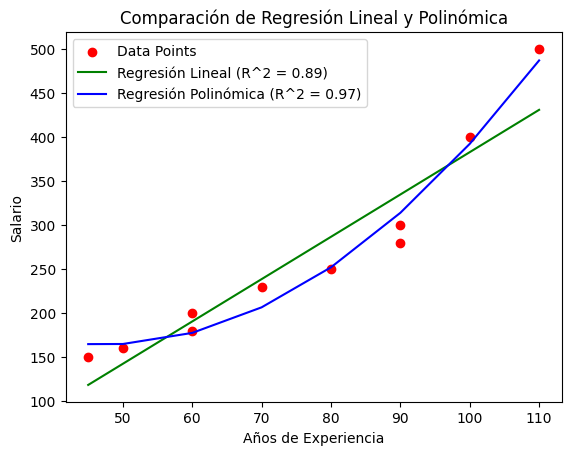

In [88]:
# Gráfico
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred, color='green', label=f'Regresión Lineal (R^2 = {r2:.2f})')
plt.plot(x, y_pred_poly, color='blue', label=f'Regresión Polinómica (R^2 = {r2_poly:.2f})')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.title('Comparación de Regresión Lineal y Polinómica')
plt.show()